In [56]:
import struct
import os
import librosa as lb
import numpy as np
import pandas as pd
import seaborn as sns
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc,logfbank

In [2]:
df = pd.read_csv("metadata/UrbanSound8K.csv")

In [3]:
df.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

In [4]:
df.describe()

fsID        start          end     salience         fold  \
count    8732.000000  8732.000000  8732.000000  8732.000000  8732.000000   
mean   116033.493816    38.645409    42.253312     1.347000     5.385937   
std     57991.017218    74.292126    74.369669     0.476043     2.846820   
min       344.000000     0.000000     0.105962     1.000000     1.000000   
25%     69942.250000     3.000000     6.839398     1.000000     3.000000   
50%    118279.000000    10.376492    14.000000     1.000000     5.000000   
75%    166942.000000    35.131372    38.866979     2.000000     8.000000   
max    209992.000000   600.125356   604.125356     2.000000    10.000000   

           classID  
count  8732.000000  
mean      4.592877  
std       2.894544  
min       0.000000  
25%       2.000000  
50%       4.000000  
75%       7.000000  
max       9.000000

In [5]:
df['class'].value_counts()

dog_bark            1000
children_playing    1000
engine_idling       1000
air_conditioner     1000
street_music        1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [21]:
df['class'].value_counts(normalize=True)

dog_bark            0.114521
children_playing    0.114521
engine_idling       0.114521
air_conditioner     0.114521
street_music        0.114521
jackhammer          0.114521
drilling            0.114521
siren               0.106390
car_horn            0.049130
gun_shot            0.042831
Name: class, dtype: float64

In [6]:
df['salience'].value_counts()

1    5702
2    3030
Name: salience, dtype: int64

# Visualization of Data

Text(0, 0.5, 'Frequency')

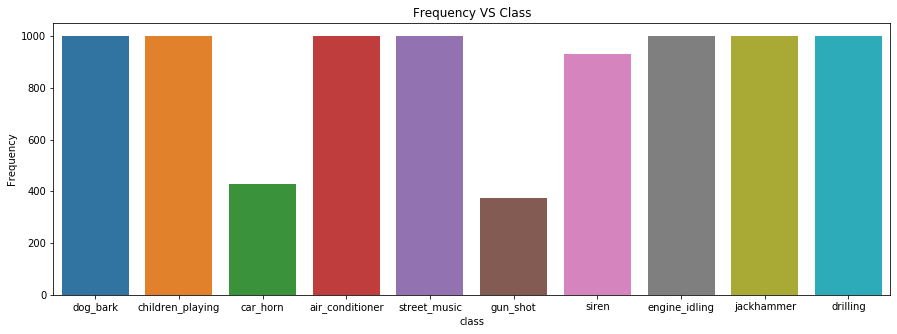

In [16]:
plt.figure(figsize=(15,5))
plt.title('Frequency VS Class')
sns.countplot(df['class'])
plt.ylabel('Frequency')


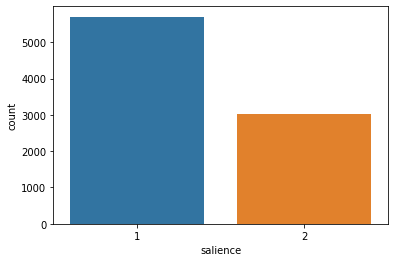

In [22]:
sns.countplot(df['salience'])

In [7]:
obj = df[df['class']==df['class'].unique()[5]][['slice_file_name','fold']].iloc[0]

In [8]:
idp.Audio(filename='audio/fold'+str(obj[1])+'/'+obj[0])             # Gunshot fire

In [9]:
rate, data = wavfile.read('audio/fold'+str(obj[1])+'/'+obj[0])

In [10]:
print(rate)                            # Sampling Rate = 44.1khz
print(data.shape)                      # Numpy.ndarray which converts the Audio into numbers

44100
(115101, 2)


In [11]:
data.shape[0]/rate                 # Gives the length of audio, here is 2sec approx

2.61

In [19]:
ls=[]
for x in range(1,11):
    ls.append(df[df['fold']==x]['class'].value_counts())
    
class_distribution = pd.DataFrame(ls)
class_distribution = class_distribution.reset_index()
class_distribution['index'] = ['fold'+str(j) for j in range(1,11)]
class_distribution

index  jackhammer  drilling  street_music  dog_bark  air_conditioner  \
0   fold1         120       100           100       100              100   
1   fold2         120       100           100       100              100   
2   fold3         120       100           100       100              100   
3   fold4         120       100           100       100              100   
4   fold5         120       100           100       100              100   
5   fold6          68       100           100       100              100   
6   fold7          76       100           100       100              100   
7   fold8          78       100           100       100              100   
8   fold9          82       100           100       100              100   
9  fold10          96       100           100       100              100   

   children_playing  engine_idling  siren  car_horn  gun_shot  
0               100             96     86        36        35  
1               100            100     91        42        35  
2               100            107    119        43        36  
3               100            107    166        59        38  
4               100            107     71        98        40  
5               100            107     74        28        46  
6               100            106     77        28        51  
7               100             88     80        30        30  
8               100             89     82        32        31  
9               100             93     83        33        32

In [170]:
def path(file_name):
    excerpt = df[df['slice_file_name']==file_name]
    path_name = 'audio/'+'fold'+str(excerpt['fold'].iloc[0])+'/'+file_name
    class_name = excerpt['class'].values[0]
    # print(path_name)
    
    return path_name,class_name
    

In [103]:
def wav_plotter(fullpath,class_n):
    
    rate, wav_sample = wavfile.read(filename=fullpath)            # Gives the sampling rate and wav_sample
    wave_file = open(fullpath,"rb")               # rb stands for read only mode
    riff_fmt = wave_file.read(36)
    # print(riff_fmt)
    bit_depth_str = riff_fmt[-2:]
    # print(bit_depth_str)
    bit_depth = struct.unpack('H',bit_depth_str)[0]                # Used to calculate the bit_deth
    
    
    print('Sampling Rate: ',rate,'Hz')
    print('Bit-depth:  ',bit_depth)
    print('No. of channels:  ',wav_sample.shape[1])
    print('Duration:  ',wav_sample.shape[0]/rate,' second')
    print('No. of Samples:  ',wav_sample.shape[0])
    print('Class:  ',class_n)
    
    
    # Plot of the wave
    
    plt.figure(figsize=(15,5))
    plt.plot(wav_sample)
    
    
    return ipd.Audio(fullpath)    

audio/fold5/100263-2-0-117.wav
Sampling Rate:  44100 Hz
Bit-depth:   16
No. of channels:   2
Duration:   4.0  second
No. of Samples:   176400
Class:   children_playing


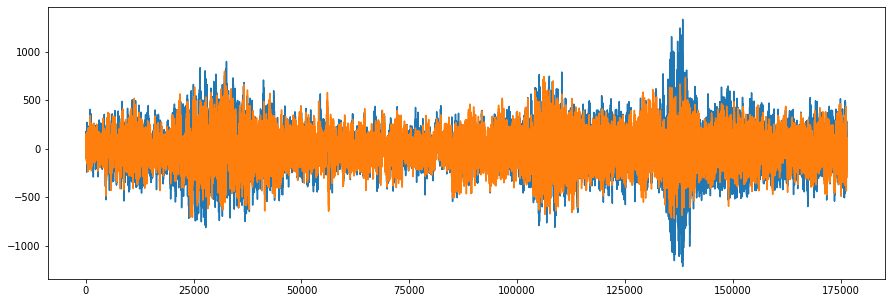

In [109]:
# for p in df['class'].unique():
#     file = df[df['class']==p]['slice_file_name'].iloc[0]
#     path_name,_ = path(file)
#     wav_plotter(path_name,p)

path_name,class_n = path('100263-2-0-117.wav')
wav_plotter(path_name,class_n)


audio/fold7/101848-9-0-0.wav
Sampling Rate:  44100 Hz
Bit-depth:   16
No. of channels:   2
Duration:   4.0  second
No. of Samples:   176400
Class:   street_music


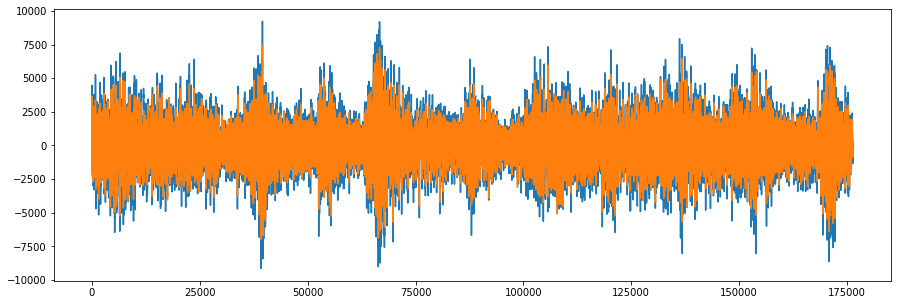

In [112]:
path_name,class_n = path('101848-9-0-0.wav')
wav_plotter(path_name,class_n)

In [136]:
def wave_fmt_parser(file_name):
    full_path,_ = path(file_name)
    wave_file = open(full_path,"rb")
    riff_fmt = wave_file.read(36)             # Read the wavefile for 36 characters
    #print(riff_fmt)
    
    n_channels_string = riff_fmt[22:24]
    #print(n_channels_string)
    n_channels = struct.unpack("H",n_channels_string)[0]
    
    s_rate_string = riff_fmt[24:28]
    #print(s_rate_string)
    s_rate = struct.unpack("I",s_rate_string)[0]
  
    bit_depth_string = riff_fmt[-2:]
    bit_depth = struct.unpack("H",bit_depth_string)[0]
    
    
    return (n_channels,s_rate,bit_depth)

In [142]:
wave_fmt_data = [wave_fmt_parser(i) for i in df['slice_file_name']] 
df[['n_channels','s_rate','bit_depth']] = pd.DataFrame(wave_fmt_data)

audio/fold5/100032-3-0-0.wav
audio/fold5/100263-2-0-117.wav
audio/fold5/100263-2-0-121.wav
audio/fold5/100263-2-0-126.wav
audio/fold5/100263-2-0-137.wav
audio/fold5/100263-2-0-143.wav
audio/fold5/100263-2-0-161.wav
audio/fold5/100263-2-0-3.wav
audio/fold5/100263-2-0-36.wav
audio/fold10/100648-1-0-0.wav
audio/fold10/100648-1-1-0.wav
audio/fold10/100648-1-2-0.wav
audio/fold10/100648-1-3-0.wav
audio/fold10/100648-1-4-0.wav
audio/fold2/100652-3-0-0.wav
audio/fold2/100652-3-0-1.wav
audio/fold2/100652-3-0-2.wav
audio/fold2/100652-3-0-3.wav
audio/fold10/100795-3-0-0.wav
audio/fold10/100795-3-1-0.wav
audio/fold10/100795-3-1-1.wav
audio/fold10/100795-3-1-2.wav
audio/fold5/100852-0-0-0.wav
audio/fold5/100852-0-0-1.wav
audio/fold5/100852-0-0-10.wav
audio/fold5/100852-0-0-11.wav
audio/fold5/100852-0-0-12.wav
audio/fold5/100852-0-0-13.wav
audio/fold5/100852-0-0-14.wav
audio/fold5/100852-0-0-15.wav
audio/fold5/100852-0-0-16.wav
audio/fold5/100852-0-0-17.wav
audio/fold5/100852-0-0-18.wav
audio/fold5/

audio/fold7/104625-4-0-15.wav
audio/fold7/104625-4-0-21.wav
audio/fold7/104625-4-0-27.wav
audio/fold7/104625-4-0-29.wav
audio/fold7/104625-4-0-3.wav
audio/fold7/104625-4-0-35.wav
audio/fold7/104625-4-0-40.wav
audio/fold7/104625-4-0-41.wav
audio/fold7/104625-4-0-45.wav
audio/fold7/104625-4-0-48.wav
audio/fold7/104625-4-0-51.wav
audio/fold7/104625-4-0-52.wav
audio/fold7/104625-4-0-53.wav
audio/fold7/104625-4-0-55.wav
audio/fold7/104625-4-0-57.wav
audio/fold7/104625-4-0-66.wav
audio/fold7/104625-4-1-20.wav
audio/fold7/104625-4-1-8.wav
audio/fold2/104817-4-0-0.wav
audio/fold2/104817-4-0-1.wav
audio/fold2/104817-4-0-10.wav
audio/fold2/104817-4-0-11.wav
audio/fold2/104817-4-0-2.wav
audio/fold2/104817-4-0-3.wav
audio/fold2/104817-4-0-4.wav
audio/fold2/104817-4-0-5.wav
audio/fold2/104817-4-0-6.wav
audio/fold2/104817-4-0-7.wav
audio/fold2/104817-4-0-8.wav
audio/fold2/104817-4-0-9.wav
audio/fold5/104998-7-0-5.wav
audio/fold5/104998-7-10-1.wav
audio/fold5/104998-7-10-10.wav
audio/fold5/104998-7-1

audio/fold2/108187-3-2-0.wav
audio/fold2/108187-3-3-0.wav
audio/fold2/108187-3-4-0.wav
audio/fold2/108187-3-6-0.wav
audio/fold5/108357-9-0-15.wav
audio/fold5/108357-9-0-2.wav
audio/fold5/108357-9-0-27.wav
audio/fold5/108357-9-0-30.wav
audio/fold5/108357-9-0-44.wav
audio/fold5/108357-9-0-49.wav
audio/fold1/108362-2-0-11.wav
audio/fold1/108362-2-0-12.wav
audio/fold1/108362-2-0-21.wav
audio/fold1/108362-2-0-23.wav
audio/fold1/108362-2-0-29.wav
audio/fold1/108362-2-0-30.wav
audio/fold1/108362-2-0-7.wav
audio/fold1/108362-2-0-9.wav
audio/fold6/108638-9-0-0.wav
audio/fold6/108638-9-0-1.wav
audio/fold6/108638-9-0-2.wav
audio/fold6/108638-9-0-4.wav
audio/fold6/108638-9-0-5.wav
audio/fold6/108638-9-0-6.wav
audio/fold6/109233-3-0-3.wav
audio/fold6/109233-3-0-4.wav
audio/fold6/109233-3-0-5.wav
audio/fold6/109233-3-0-6.wav
audio/fold5/109263-9-0-34.wav
audio/fold5/109263-9-0-39.wav
audio/fold5/109263-9-0-54.wav
audio/fold5/109263-9-0-61.wav
audio/fold5/109263-9-0-78.wav
audio/fold2/109703-2-0-134.

audio/fold7/116485-3-0-6.wav
audio/fold7/116485-3-2-0.wav
audio/fold7/116485-3-2-4.wav
audio/fold3/117048-3-0-17.wav
audio/fold3/117048-3-0-23.wav
audio/fold3/117048-3-0-25.wav
audio/fold3/117048-3-0-35.wav
audio/fold3/117072-3-0-11.wav
audio/fold3/117072-3-0-14.wav
audio/fold3/117072-3-0-19.wav
audio/fold3/117072-3-0-8.wav
audio/fold8/117181-8-0-0.wav
audio/fold8/117181-8-0-1.wav
audio/fold8/117181-8-0-10.wav
audio/fold8/117181-8-0-11.wav
audio/fold8/117181-8-0-12.wav
audio/fold8/117181-8-0-2.wav
audio/fold8/117181-8-0-3.wav
audio/fold8/117181-8-0-4.wav
audio/fold8/117181-8-0-5.wav
audio/fold8/117181-8-0-6.wav
audio/fold8/117181-8-0-7.wav
audio/fold8/117181-8-0-8.wav
audio/fold8/117181-8-0-9.wav
audio/fold10/11722-3-0-0.wav
audio/fold10/11722-3-1-0.wav
audio/fold6/117271-3-0-0.wav
audio/fold6/117271-3-0-1.wav
audio/fold6/117271-3-0-2.wav
audio/fold6/117271-3-0-3.wav
audio/fold4/117536-1-0-0.wav
audio/fold10/117889-9-0-12.wav
audio/fold10/117889-9-0-20.wav
audio/fold10/117889-9-0-30.wa

audio/fold8/125678-7-3-4.wav
audio/fold8/125678-7-3-5.wav
audio/fold8/125678-7-3-6.wav
audio/fold8/125678-7-3-7.wav
audio/fold8/125678-7-4-0.wav
audio/fold8/125678-7-4-1.wav
audio/fold8/125678-7-4-2.wav
audio/fold8/125678-7-4-3.wav
audio/fold8/125678-7-4-4.wav
audio/fold8/125678-7-4-5.wav
audio/fold8/125678-7-4-6.wav
audio/fold8/125678-7-4-7.wav
audio/fold8/125678-7-4-8.wav
audio/fold1/125791-3-0-12.wav
audio/fold1/125791-3-0-13.wav
audio/fold1/125791-3-0-15.wav
audio/fold1/125791-3-0-9.wav
audio/fold8/126153-9-0-0.wav
audio/fold8/126153-9-0-1.wav
audio/fold8/126153-9-0-11.wav
audio/fold8/126153-9-0-4.wav
audio/fold8/126153-9-0-5.wav
audio/fold8/126153-9-0-6.wav
audio/fold8/126153-9-0-8.wav
audio/fold3/12647-3-0-0.wav
audio/fold3/12647-3-1-0.wav
audio/fold3/12647-3-2-0.wav
audio/fold3/12647-3-3-0.wav
audio/fold5/126521-3-0-12.wav
audio/fold5/126521-3-0-17.wav
audio/fold5/126521-3-0-18.wav
audio/fold5/126521-3-0-2.wav
audio/fold7/127443-4-0-0.wav
audio/fold7/127443-4-0-1.wav
audio/fold7

audio/fold1/134717-0-0-9.wav
audio/fold6/135160-8-0-0.wav
audio/fold6/135160-8-0-1.wav
audio/fold6/135160-8-0-10.wav
audio/fold6/135160-8-0-11.wav
audio/fold6/135160-8-0-2.wav
audio/fold6/135160-8-0-3.wav
audio/fold6/135160-8-0-4.wav
audio/fold6/135160-8-0-5.wav
audio/fold6/135160-8-0-6.wav
audio/fold6/135160-8-0-7.wav
audio/fold6/135160-8-0-8.wav
audio/fold6/135160-8-0-9.wav
audio/fold3/135526-6-0-0.wav
audio/fold3/135526-6-1-0.wav
audio/fold3/135526-6-10-0.wav
audio/fold3/135526-6-11-0.wav
audio/fold3/135526-6-12-0.wav
audio/fold3/135526-6-13-0.wav
audio/fold3/135526-6-2-0.wav
audio/fold3/135526-6-3-0.wav
audio/fold3/135526-6-4-0.wav
audio/fold3/135526-6-5-0.wav
audio/fold3/135526-6-6-0.wav
audio/fold3/135526-6-7-0.wav
audio/fold3/135526-6-8-0.wav
audio/fold3/135526-6-9-0.wav
audio/fold7/135527-6-0-0.wav
audio/fold7/135527-6-1-0.wav
audio/fold7/135527-6-10-0.wav
audio/fold7/135527-6-11-0.wav
audio/fold7/135527-6-12-0.wav
audio/fold7/135527-6-13-0.wav
audio/fold7/135527-6-14-0.wav
aud

audio/fold4/144007-5-0-18.wav
audio/fold4/144007-5-0-19.wav
audio/fold4/144007-5-0-2.wav
audio/fold4/144007-5-0-20.wav
audio/fold4/144007-5-0-21.wav
audio/fold4/144007-5-0-3.wav
audio/fold4/144007-5-0-4.wav
audio/fold4/144007-5-0-5.wav
audio/fold4/144007-5-0-6.wav
audio/fold4/144007-5-0-7.wav
audio/fold4/144007-5-0-8.wav
audio/fold4/144007-5-0-9.wav
audio/fold4/144007-5-1-0.wav
audio/fold4/144007-5-1-1.wav
audio/fold4/144007-5-1-10.wav
audio/fold4/144007-5-1-11.wav
audio/fold4/144007-5-1-2.wav
audio/fold4/144007-5-1-3.wav
audio/fold4/144007-5-1-4.wav
audio/fold4/144007-5-1-5.wav
audio/fold4/144007-5-1-6.wav
audio/fold4/144007-5-1-7.wav
audio/fold4/144007-5-1-8.wav
audio/fold4/144007-5-1-9.wav
audio/fold8/144028-3-0-0.wav
audio/fold8/144028-3-1-0.wav
audio/fold8/144028-3-1-1.wav
audio/fold3/144068-5-0-0.wav
audio/fold3/144068-5-0-1.wav
audio/fold3/144068-5-0-10.wav
audio/fold3/144068-5-0-11.wav
audio/fold3/144068-5-0-12.wav
audio/fold3/144068-5-0-13.wav
audio/fold3/144068-5-0-14.wav
aud

audio/fold1/147764-4-4-1.wav
audio/fold1/147764-4-4-2.wav
audio/fold1/147764-4-5-0.wav
audio/fold1/147764-4-6-0.wav
audio/fold1/147764-4-7-0.wav
audio/fold1/147764-4-8-0.wav
audio/fold2/14780-9-0-0.wav
audio/fold2/14780-9-0-1.wav
audio/fold2/14780-9-0-2.wav
audio/fold2/147926-0-0-10.wav
audio/fold2/147926-0-0-11.wav
audio/fold2/147926-0-0-12.wav
audio/fold2/147926-0-0-16.wav
audio/fold2/147926-0-0-17.wav
audio/fold2/147926-0-0-2.wav
audio/fold2/147926-0-0-20.wav
audio/fold2/147926-0-0-21.wav
audio/fold2/147926-0-0-27.wav
audio/fold2/147926-0-0-28.wav
audio/fold2/147926-0-0-34.wav
audio/fold2/147926-0-0-35.wav
audio/fold2/147926-0-0-36.wav
audio/fold2/147926-0-0-37.wav
audio/fold2/147926-0-0-39.wav
audio/fold2/147926-0-0-4.wav
audio/fold2/147926-0-0-41.wav
audio/fold2/147926-0-0-42.wav
audio/fold2/147926-0-0-44.wav
audio/fold2/147926-0-0-5.wav
audio/fold2/147926-0-0-50.wav
audio/fold2/147926-0-0-52.wav
audio/fold2/147926-0-0-54.wav
audio/fold2/147926-0-0-7.wav
audio/fold9/148166-6-0-0.w

audio/fold7/155238-2-0-97.wav
audio/fold10/155241-9-0-50.wav
audio/fold10/155241-9-0-56.wav
audio/fold10/155241-9-0-69.wav
audio/fold10/155241-9-0-79.wav
audio/fold10/155241-9-0-8.wav
audio/fold10/155241-9-0-88.wav
audio/fold9/155242-9-0-12.wav
audio/fold9/155242-9-0-15.wav
audio/fold9/155242-9-0-27.wav
audio/fold9/155242-9-0-35.wav
audio/fold9/155242-9-0-4.wav
audio/fold9/155242-9-0-44.wav
audio/fold5/155243-9-0-18.wav
audio/fold5/155243-9-0-24.wav
audio/fold5/155243-9-0-32.wav
audio/fold5/155243-9-0-42.wav
audio/fold5/155243-9-0-53.wav
audio/fold5/155243-9-0-55.wav
audio/fold10/155262-2-0-101.wav
audio/fold10/155262-2-0-11.wav
audio/fold10/155262-2-0-15.wav
audio/fold10/155262-2-0-2.wav
audio/fold10/155262-2-0-21.wav
audio/fold10/155262-2-0-48.wav
audio/fold10/155262-2-0-58.wav
audio/fold10/155262-2-0-63.wav
audio/fold3/155263-2-0-12.wav
audio/fold3/155263-2-0-22.wav
audio/fold3/155263-2-0-23.wav
audio/fold3/155263-2-0-34.wav
audio/fold3/155263-2-0-43.wav
audio/fold3/155263-2-0-50.wa

audio/fold8/157868-8-0-5.wav
audio/fold8/157868-8-0-6.wav
audio/fold8/157868-8-0-7.wav
audio/fold8/157868-8-0-8.wav
audio/fold8/157868-8-0-9.wav
audio/fold7/157940-9-0-0.wav
audio/fold7/157940-9-0-2.wav
audio/fold7/157940-9-0-3.wav
audio/fold7/157940-9-0-4.wav
audio/fold7/157940-9-0-5.wav
audio/fold7/157940-9-0-6.wav
audio/fold7/157950-3-0-0.wav
audio/fold7/158593-2-0-0.wav
audio/fold7/158593-2-0-31.wav
audio/fold7/158593-2-0-43.wav
audio/fold7/158593-2-0-47.wav
audio/fold7/158593-2-0-52.wav
audio/fold7/158593-2-0-54.wav
audio/fold7/158593-2-0-8.wav
audio/fold2/158597-2-0-16.wav
audio/fold2/158597-2-0-2.wav
audio/fold2/158597-2-0-3.wav
audio/fold2/158597-2-0-30.wav
audio/fold2/158597-2-0-33.wav
audio/fold2/158597-2-0-41.wav
audio/fold2/158597-2-0-57.wav
audio/fold2/158597-2-0-85.wav
audio/fold2/158607-3-0-0.wav
audio/fold2/158607-3-1-0.wav
audio/fold2/158607-3-2-0.wav
audio/fold4/158608-8-0-0.wav
audio/fold4/158608-8-0-1.wav
audio/fold4/158608-8-0-10.wav
audio/fold4/158608-8-0-2.wav
au

audio/fold2/160011-2-0-12.wav
audio/fold2/160011-2-0-3.wav
audio/fold2/160011-2-0-34.wav
audio/fold2/160011-2-0-5.wav
audio/fold2/160011-2-0-7.wav
audio/fold2/160011-2-0-9.wav
audio/fold8/160016-2-0-13.wav
audio/fold8/160016-2-0-25.wav
audio/fold8/160016-2-0-26.wav
audio/fold8/160016-2-0-37.wav
audio/fold8/160016-2-0-40.wav
audio/fold8/160016-2-0-5.wav
audio/fold8/160016-2-0-8.wav
audio/fold2/160092-3-0-0.wav
audio/fold3/160093-3-0-0.wav
audio/fold1/160094-3-0-0.wav
audio/fold2/160366-3-0-13.wav
audio/fold2/160366-3-0-4.wav
audio/fold2/160366-3-0-7.wav
audio/fold2/160366-3-0-8.wav
audio/fold6/160575-3-0-0.wav
audio/fold6/160575-3-1-0.wav
audio/fold6/160575-3-4-0.wav
audio/fold6/160575-3-7-0.wav
audio/fold9/161005-2-0-0.wav
audio/fold9/161005-2-0-12.wav
audio/fold9/161005-2-0-14.wav
audio/fold9/161005-2-0-19.wav
audio/fold9/161005-2-0-27.wav
audio/fold9/161005-2-0-28.wav
audio/fold9/161005-2-0-4.wav
audio/fold9/161005-2-0-6.wav
audio/fold4/161010-1-0-0.wav
audio/fold4/161010-1-1-0.wav
a

audio/fold3/165039-7-4-1.wav
audio/fold3/165039-7-4-2.wav
audio/fold3/165039-7-5-0.wav
audio/fold3/165039-7-5-1.wav
audio/fold3/165039-7-6-0.wav
audio/fold3/165039-7-6-1.wav
audio/fold3/165039-7-7-0.wav
audio/fold3/165039-7-8-0.wav
audio/fold3/165039-7-8-1.wav
audio/fold3/165039-7-8-2.wav
audio/fold3/165039-7-9-0.wav
audio/fold1/165067-2-0-111.wav
audio/fold1/165067-2-0-112.wav
audio/fold1/165067-2-0-35.wav
audio/fold1/165067-2-0-56.wav
audio/fold1/165067-2-0-72.wav
audio/fold1/165067-2-0-9.wav
audio/fold1/165067-2-0-91.wav
audio/fold10/165166-8-0-0.wav
audio/fold10/165166-8-0-1.wav
audio/fold10/165166-8-0-2.wav
audio/fold10/165166-8-0-3.wav
audio/fold10/165166-8-0-4.wav
audio/fold10/165166-8-0-5.wav
audio/fold10/165166-8-0-6.wav
audio/fold10/165166-8-0-7.wav
audio/fold10/165166-8-0-8.wav
audio/fold7/165192-9-0-118.wav
audio/fold7/165192-9-0-146.wav
audio/fold7/165192-9-0-160.wav
audio/fold7/165192-9-0-5.wav
audio/fold7/165192-9-0-76.wav
audio/fold7/165192-9-0-87.wav
audio/fold9/165454

audio/fold6/169045-2-0-3.wav
audio/fold6/169045-2-0-8.wav
audio/fold2/169098-7-0-0.wav
audio/fold2/169098-7-0-1.wav
audio/fold2/169098-7-0-2.wav
audio/fold2/169098-7-0-3.wav
audio/fold2/169098-7-0-4.wav
audio/fold2/169098-7-0-5.wav
audio/fold2/169098-7-0-6.wav
audio/fold2/169098-7-0-7.wav
audio/fold2/169098-7-0-8.wav
audio/fold2/169098-7-0-9.wav
audio/fold2/169098-7-1-0.wav
audio/fold2/169098-7-2-0.wav
audio/fold2/169098-7-3-0.wav
audio/fold2/169098-7-3-1.wav
audio/fold2/169098-7-4-0.wav
audio/fold2/169098-7-4-1.wav
audio/fold2/169098-7-4-10.wav
audio/fold2/169098-7-4-11.wav
audio/fold2/169098-7-4-2.wav
audio/fold2/169098-7-4-3.wav
audio/fold2/169098-7-4-4.wav
audio/fold2/169098-7-4-5.wav
audio/fold2/169098-7-4-6.wav
audio/fold2/169098-7-4-7.wav
audio/fold2/169098-7-4-8.wav
audio/fold2/169098-7-4-9.wav
audio/fold10/169261-6-0-0.wav
audio/fold4/169466-4-0-12.wav
audio/fold4/169466-4-0-7.wav
audio/fold4/169466-4-0-8.wav
audio/fold4/169466-4-1-3.wav
audio/fold4/169466-4-1-5.wav
audio/fold

audio/fold2/174906-2-0-11.wav
audio/fold2/174906-2-0-14.wav
audio/fold2/174906-2-0-18.wav
audio/fold2/174906-2-0-20.wav
audio/fold2/174906-2-0-21.wav
audio/fold2/174906-2-0-6.wav
audio/fold2/174906-2-0-8.wav
audio/fold2/174994-3-0-0.wav
audio/fold2/174994-3-0-1.wav
audio/fold2/174994-3-0-2.wav
audio/fold2/174994-3-0-4.wav
audio/fold7/175296-2-0-123.wav
audio/fold7/175296-2-0-128.wav
audio/fold7/175296-2-0-140.wav
audio/fold7/175296-2-0-212.wav
audio/fold7/175296-2-0-3.wav
audio/fold7/175296-2-0-54.wav
audio/fold7/175296-2-0-76.wav
audio/fold7/175296-2-0-86.wav
audio/fold5/17578-5-0-0.wav
audio/fold5/17578-5-0-1.wav
audio/fold5/17578-5-0-10.wav
audio/fold5/17578-5-0-11.wav
audio/fold5/17578-5-0-12.wav
audio/fold5/17578-5-0-14.wav
audio/fold5/17578-5-0-15.wav
audio/fold5/17578-5-0-16.wav
audio/fold5/17578-5-0-18.wav
audio/fold5/17578-5-0-2.wav
audio/fold5/17578-5-0-21.wav
audio/fold5/17578-5-0-22.wav
audio/fold5/17578-5-0-23.wav
audio/fold5/17578-5-0-24.wav
audio/fold5/17578-5-0-25.wav
a

audio/fold7/177729-0-0-50.wav
audio/fold7/177729-0-0-51.wav
audio/fold7/177729-0-0-53.wav
audio/fold7/177729-0-0-58.wav
audio/fold7/177729-0-0-63.wav
audio/fold7/177729-0-0-67.wav
audio/fold7/177729-0-0-68.wav
audio/fold7/177729-0-0-69.wav
audio/fold7/177729-0-0-73.wav
audio/fold7/177729-0-0-74.wav
audio/fold7/177729-0-0-80.wav
audio/fold7/177729-0-0-82.wav
audio/fold7/177729-0-0-83.wav
audio/fold7/177729-0-0-89.wav
audio/fold7/177729-0-0-91.wav
audio/fold7/177729-0-0-97.wav
audio/fold7/177729-0-0-98.wav
audio/fold3/177742-0-0-10.wav
audio/fold3/177742-0-0-102.wav
audio/fold3/177742-0-0-111.wav
audio/fold3/177742-0-0-149.wav
audio/fold3/177742-0-0-161.wav
audio/fold3/177742-0-0-164.wav
audio/fold3/177742-0-0-165.wav
audio/fold3/177742-0-0-17.wav
audio/fold3/177742-0-0-178.wav
audio/fold3/177742-0-0-196.wav
audio/fold3/177742-0-0-202.wav
audio/fold3/177742-0-0-203.wav
audio/fold3/177742-0-0-204.wav
audio/fold3/177742-0-0-205.wav
audio/fold3/177742-0-0-211.wav
audio/fold3/177742-0-0-214.

audio/fold5/180125-4-3-4.wav
audio/fold2/180126-4-0-0.wav
audio/fold2/180126-4-1-0.wav
audio/fold2/180126-4-1-1.wav
audio/fold2/180126-4-1-2.wav
audio/fold2/180126-4-2-0.wav
audio/fold2/180126-4-3-0.wav
audio/fold2/180126-4-4-0.wav
audio/fold2/180126-4-4-1.wav
audio/fold2/180126-4-4-2.wav
audio/fold10/180127-4-0-0.wav
audio/fold10/180127-4-0-1.wav
audio/fold10/180127-4-0-10.wav
audio/fold10/180127-4-0-11.wav
audio/fold10/180127-4-0-12.wav
audio/fold10/180127-4-0-13.wav
audio/fold10/180127-4-0-14.wav
audio/fold10/180127-4-0-15.wav
audio/fold10/180127-4-0-16.wav
audio/fold10/180127-4-0-17.wav
audio/fold10/180127-4-0-18.wav
audio/fold10/180127-4-0-19.wav
audio/fold10/180127-4-0-2.wav
audio/fold10/180127-4-0-20.wav
audio/fold10/180127-4-0-21.wav
audio/fold10/180127-4-0-3.wav
audio/fold10/180127-4-0-4.wav
audio/fold10/180127-4-0-5.wav
audio/fold10/180127-4-0-6.wav
audio/fold10/180127-4-0-7.wav
audio/fold10/180127-4-0-8.wav
audio/fold10/180127-4-0-9.wav
audio/fold5/180128-4-0-0.wav
audio/fol

audio/fold6/184805-0-0-27.wav
audio/fold6/184805-0-0-32.wav
audio/fold6/184805-0-0-34.wav
audio/fold6/184805-0-0-4.wav
audio/fold6/184805-0-0-40.wav
audio/fold6/184805-0-0-45.wav
audio/fold6/184805-0-0-47.wav
audio/fold6/184805-0-0-48.wav
audio/fold6/184805-0-0-49.wav
audio/fold6/184805-0-0-5.wav
audio/fold6/184805-0-0-51.wav
audio/fold6/184805-0-0-54.wav
audio/fold6/184805-0-0-57.wav
audio/fold6/184805-0-0-58.wav
audio/fold6/184805-0-0-61.wav
audio/fold6/184805-0-0-63.wav
audio/fold6/184805-0-0-64.wav
audio/fold6/184805-0-0-74.wav
audio/fold6/184805-0-0-75.wav
audio/fold6/184805-0-0-77.wav
audio/fold6/184805-0-0-81.wav
audio/fold6/184805-0-0-82.wav
audio/fold6/184805-0-0-88.wav
audio/fold6/184805-0-0-90.wav
audio/fold6/184805-0-0-99.wav
audio/fold3/185373-9-0-21.wav
audio/fold3/185373-9-0-6.wav
audio/fold3/185373-9-1-17.wav
audio/fold3/185373-9-1-46.wav
audio/fold3/185373-9-1-7.wav
audio/fold3/185373-9-1-70.wav
audio/fold9/185374-9-0-16.wav
audio/fold9/185374-9-0-18.wav
audio/fold9/18

audio/fold10/189982-0-0-38.wav
audio/fold10/189982-0-0-39.wav
audio/fold10/189982-0-0-4.wav
audio/fold10/189982-0-0-42.wav
audio/fold10/189982-0-0-43.wav
audio/fold10/189982-0-0-44.wav
audio/fold10/189982-0-0-45.wav
audio/fold10/189982-0-0-6.wav
audio/fold10/189982-0-0-7.wav
audio/fold10/189985-0-0-0.wav
audio/fold10/189985-0-0-1.wav
audio/fold10/189985-0-0-2.wav
audio/fold10/189985-0-0-3.wav
audio/fold10/189985-0-0-4.wav
audio/fold10/189985-0-0-5.wav
audio/fold10/189985-0-0-6.wav
audio/fold6/189986-0-0-0.wav
audio/fold7/189987-0-0-0.wav
audio/fold7/189987-0-0-1.wav
audio/fold7/189987-0-0-2.wav
audio/fold7/189987-0-0-3.wav
audio/fold7/189987-0-0-4.wav
audio/fold9/189988-0-0-0.wav
audio/fold9/189988-0-0-1.wav
audio/fold9/189988-0-0-2.wav
audio/fold9/189988-0-0-3.wav
audio/fold9/189988-0-0-4.wav
audio/fold9/189988-0-0-5.wav
audio/fold9/189989-0-0-0.wav
audio/fold9/189989-0-0-1.wav
audio/fold9/189989-0-0-2.wav
audio/fold2/189991-0-0-0.wav
audio/fold2/189991-0-0-1.wav
audio/fold2/189991-0-

audio/fold7/196075-2-0-0.wav
audio/fold6/196076-2-0-0.wav
audio/fold6/196077-2-0-0.wav
audio/fold6/196077-2-0-1.wav
audio/fold2/196078-2-0-0.wav
audio/fold1/196079-2-0-0.wav
audio/fold4/196080-2-0-0.wav
audio/fold5/196081-2-0-0.wav
audio/fold2/196082-2-0-0.wav
audio/fold3/196083-2-0-0.wav
audio/fold10/196084-2-0-0.wav
audio/fold10/196084-2-0-1.wav
audio/fold10/196084-2-0-2.wav
audio/fold5/196085-2-0-0.wav
audio/fold5/196085-2-0-1.wav
audio/fold5/196085-2-0-2.wav
audio/fold5/196085-2-0-3.wav
audio/fold5/196085-2-0-4.wav
audio/fold10/196086-2-0-0.wav
audio/fold1/196087-2-0-0.wav
audio/fold6/196088-2-0-0.wav
audio/fold10/196127-3-0-0.wav
audio/fold10/196127-3-0-1.wav
audio/fold10/196127-3-0-3.wav
audio/fold10/196127-3-0-4.wav
audio/fold2/196384-9-0-11.wav
audio/fold2/196384-9-0-15.wav
audio/fold2/196384-9-0-16.wav
audio/fold2/196384-9-0-18.wav
audio/fold2/196384-9-0-2.wav
audio/fold2/196384-9-0-27.wav
audio/fold1/196400-6-0-0.wav
audio/fold8/196561-3-0-16.wav
audio/fold8/196561-3-0-29.wav

audio/fold2/203929-7-3-10.wav
audio/fold2/203929-7-3-2.wav
audio/fold2/203929-7-3-3.wav
audio/fold2/203929-7-3-5.wav
audio/fold2/203929-7-3-9.wav
audio/fold2/203929-7-4-0.wav
audio/fold2/203929-7-4-1.wav
audio/fold2/203929-7-4-10.wav
audio/fold2/203929-7-4-11.wav
audio/fold2/203929-7-4-12.wav
audio/fold2/203929-7-4-2.wav
audio/fold2/203929-7-4-4.wav
audio/fold2/203929-7-4-6.wav
audio/fold2/203929-7-4-7.wav
audio/fold2/203929-7-4-8.wav
audio/fold2/203929-7-5-0.wav
audio/fold2/203929-7-5-1.wav
audio/fold2/203929-7-5-10.wav
audio/fold2/203929-7-5-11.wav
audio/fold2/203929-7-5-6.wav
audio/fold2/203929-7-5-7.wav
audio/fold2/203929-7-6-1.wav
audio/fold2/203929-7-6-10.wav
audio/fold2/203929-7-6-11.wav
audio/fold2/203929-7-6-2.wav
audio/fold2/203929-7-6-3.wav
audio/fold2/203929-7-6-8.wav
audio/fold2/203929-7-6-9.wav
audio/fold2/203929-7-7-0.wav
audio/fold2/203929-7-7-10.wav
audio/fold2/203929-7-7-12.wav
audio/fold2/203929-7-7-13.wav
audio/fold2/203929-7-7-14.wav
audio/fold2/203929-7-7-15.wav
a

audio/fold3/22601-8-0-24.wav
audio/fold3/22601-8-0-25.wav
audio/fold3/22601-8-0-26.wav
audio/fold3/22601-8-0-27.wav
audio/fold3/22601-8-0-28.wav
audio/fold3/22601-8-0-29.wav
audio/fold3/22601-8-0-3.wav
audio/fold3/22601-8-0-30.wav
audio/fold3/22601-8-0-31.wav
audio/fold3/22601-8-0-32.wav
audio/fold3/22601-8-0-33.wav
audio/fold3/22601-8-0-34.wav
audio/fold3/22601-8-0-35.wav
audio/fold3/22601-8-0-36.wav
audio/fold3/22601-8-0-37.wav
audio/fold3/22601-8-0-38.wav
audio/fold3/22601-8-0-39.wav
audio/fold3/22601-8-0-4.wav
audio/fold3/22601-8-0-40.wav
audio/fold3/22601-8-0-41.wav
audio/fold3/22601-8-0-42.wav
audio/fold3/22601-8-0-43.wav
audio/fold3/22601-8-0-44.wav
audio/fold3/22601-8-0-45.wav
audio/fold3/22601-8-0-46.wav
audio/fold3/22601-8-0-47.wav
audio/fold3/22601-8-0-48.wav
audio/fold3/22601-8-0-49.wav
audio/fold3/22601-8-0-5.wav
audio/fold3/22601-8-0-50.wav
audio/fold3/22601-8-0-51.wav
audio/fold3/22601-8-0-52.wav
audio/fold3/22601-8-0-53.wav
audio/fold3/22601-8-0-54.wav
audio/fold3/22601

audio/fold5/26184-5-1-0.wav
audio/fold5/26184-5-2-0.wav
audio/fold5/26184-5-3-0.wav
audio/fold5/26184-5-4-0.wav
audio/fold5/26184-5-4-1.wav
audio/fold5/26184-5-4-2.wav
audio/fold5/26184-5-4-3.wav
audio/fold9/26185-1-0-0.wav
audio/fold9/26185-1-1-0.wav
audio/fold9/26186-1-0-0.wav
audio/fold10/26255-3-0-0.wav
audio/fold10/26255-3-13-1.wav
audio/fold10/26255-3-6-0.wav
audio/fold10/26255-3-8-0.wav
audio/fold4/26256-3-4-0.wav
audio/fold4/26256-3-5-22.wav
audio/fold4/26256-3-6-6.wav
audio/fold4/26256-3-7-36.wav
audio/fold1/26270-9-0-19.wav
audio/fold1/26270-9-0-23.wav
audio/fold1/26270-9-0-3.wav
audio/fold1/26270-9-0-30.wav
audio/fold1/26270-9-0-32.wav
audio/fold1/26270-9-0-35.wav
audio/fold10/26344-4-0-0.wav
audio/fold10/26344-4-1-0.wav
audio/fold9/27068-1-0-0.wav
audio/fold10/27070-2-0-0.wav
audio/fold10/27070-2-0-2.wav
audio/fold10/27070-2-0-3.wav
audio/fold10/27070-2-0-4.wav
audio/fold10/27070-2-0-5.wav
audio/fold10/27070-2-0-7.wav
audio/fold10/27070-2-0-8.wav
audio/fold7/27216-3-0-18.wa

audio/fold3/34708-6-5-0.wav
audio/fold5/34771-3-0-10.wav
audio/fold5/34771-3-0-14.wav
audio/fold5/34771-3-0-4.wav
audio/fold5/34771-3-0-5.wav
audio/fold8/34866-9-0-10.wav
audio/fold8/34866-9-0-11.wav
audio/fold8/34866-9-0-13.wav
audio/fold8/34866-9-0-3.wav
audio/fold8/34866-9-0-5.wav
audio/fold8/34866-9-0-9.wav
audio/fold7/34871-3-11-0.wav
audio/fold7/34871-3-6-0.wav
audio/fold7/34871-3-8-0.wav
audio/fold7/34871-3-9-0.wav
audio/fold5/34872-3-0-0.wav
audio/fold5/34872-3-0-1.wav
audio/fold5/34872-3-0-2.wav
audio/fold4/34931-3-0-0.wav
audio/fold6/34952-8-0-0.wav
audio/fold6/34952-8-0-1.wav
audio/fold6/34952-8-0-2.wav
audio/fold6/34952-8-0-3.wav
audio/fold6/34952-8-0-4.wav
audio/fold6/34952-8-0-5.wav
audio/fold6/34952-8-0-6.wav
audio/fold6/34952-8-0-7.wav
audio/fold4/35296-3-0-0.wav
audio/fold4/35296-3-1-0.wav
audio/fold4/35296-3-2-0.wav
audio/fold7/35382-0-0-0.wav
audio/fold7/35382-0-0-1.wav
audio/fold6/35548-9-0-10.wav
audio/fold6/35548-9-0-21.wav
audio/fold6/35548-9-0-23.wav
audio/fold6

audio/fold8/44110-3-0-0.wav
audio/fold8/44110-3-1-0.wav
audio/fold8/44110-3-3-0.wav
audio/fold8/44110-3-4-0.wav
audio/fold4/44278-1-0-0.wav
audio/fold4/44278-1-1-0.wav
audio/fold6/44325-9-0-18.wav
audio/fold6/44325-9-0-21.wav
audio/fold6/44325-9-0-35.wav
audio/fold6/44325-9-0-67.wav
audio/fold6/44325-9-0-72.wav
audio/fold6/44325-9-0-78.wav
audio/fold2/44735-5-0-0.wav
audio/fold2/44735-5-0-1.wav
audio/fold1/44736-5-0-0.wav
audio/fold1/44736-5-0-1.wav
audio/fold7/44737-5-0-0.wav
audio/fold7/44737-5-0-1.wav
audio/fold7/44737-5-0-2.wav
audio/fold7/44737-5-0-3.wav
audio/fold3/44831-3-0-0.wav
audio/fold3/44831-3-1-0.wav
audio/fold3/44831-3-2-0.wav
audio/fold5/45256-1-0-0.wav
audio/fold6/46299-2-0-0.wav
audio/fold6/46299-2-0-16.wav
audio/fold6/46299-2-0-21.wav
audio/fold6/46299-2-0-22.wav
audio/fold6/46299-2-0-36.wav
audio/fold6/46299-2-0-48.wav
audio/fold6/46299-2-0-8.wav
audio/fold6/46299-2-0-9.wav
audio/fold5/46391-1-0-0.wav
audio/fold5/46391-1-1-0.wav
audio/fold1/46654-6-0-0.wav
audio/fol

audio/fold9/54823-3-1-0.wav
audio/fold9/54823-3-2-1.wav
audio/fold1/54858-3-0-0.wav
audio/fold1/54858-3-1-2.wav
audio/fold1/54858-3-2-0.wav
audio/fold3/54898-8-0-0.wav
audio/fold3/54898-8-0-1.wav
audio/fold3/54898-8-0-10.wav
audio/fold3/54898-8-0-2.wav
audio/fold3/54898-8-0-3.wav
audio/fold3/54898-8-0-4.wav
audio/fold3/54898-8-0-5.wav
audio/fold3/54898-8-0-6.wav
audio/fold3/54898-8-0-7.wav
audio/fold3/54898-8-0-8.wav
audio/fold3/54898-8-0-9.wav
audio/fold8/54914-2-0-23.wav
audio/fold8/54914-2-0-26.wav
audio/fold8/54914-2-0-27.wav
audio/fold8/54914-2-0-3.wav
audio/fold8/54914-2-0-34.wav
audio/fold8/54914-2-0-35.wav
audio/fold8/54914-2-0-48.wav
audio/fold9/54976-4-0-0.wav
audio/fold9/54976-4-0-1.wav
audio/fold9/54976-4-0-2.wav
audio/fold9/54976-4-0-3.wav
audio/fold9/54976-4-0-4.wav
audio/fold9/54976-4-0-5.wav
audio/fold9/54976-4-0-6.wav
audio/fold9/54976-4-0-7.wav
audio/fold9/54976-4-0-8.wav
audio/fold9/54976-4-0-9.wav
audio/fold9/54976-4-1-0.wav
audio/fold9/54976-4-1-1.wav
audio/fold9/5

audio/fold4/61790-9-0-15.wav
audio/fold4/61790-9-0-16.wav
audio/fold4/61790-9-0-20.wav
audio/fold4/61790-9-1-1.wav
audio/fold4/61790-9-1-20.wav
audio/fold3/61791-9-1-1.wav
audio/fold3/61791-9-1-40.wav
audio/fold3/61791-9-1-41.wav
audio/fold3/61791-9-1-42.wav
audio/fold3/61791-9-1-44.wav
audio/fold3/61791-9-1-46.wav
audio/fold8/62048-3-0-2.wav
audio/fold8/62048-3-0-3.wav
audio/fold8/62048-3-0-4.wav
audio/fold8/62048-3-0-5.wav
audio/fold4/62461-0-0-0.wav
audio/fold4/62461-0-0-1.wav
audio/fold4/62461-0-0-2.wav
audio/fold4/62461-0-0-3.wav
audio/fold6/62564-5-0-0.wav
audio/fold6/62564-5-0-1.wav
audio/fold6/62564-5-0-10.wav
audio/fold6/62564-5-0-2.wav
audio/fold6/62564-5-0-3.wav
audio/fold6/62564-5-0-4.wav
audio/fold6/62564-5-0-5.wav
audio/fold6/62564-5-0-6.wav
audio/fold6/62564-5-0-7.wav
audio/fold6/62564-5-0-8.wav
audio/fold6/62564-5-0-9.wav
audio/fold5/62566-5-0-0.wav
audio/fold5/62566-5-0-1.wav
audio/fold5/62566-5-0-2.wav
audio/fold5/62566-5-0-3.wav
audio/fold5/62566-5-0-4.wav
audio/fold

audio/fold3/69598-4-8-0.wav
audio/fold3/69598-4-9-0.wav
audio/fold10/69661-3-0-14.wav
audio/fold10/69661-3-0-23.wav
audio/fold10/69661-3-0-29.wav
audio/fold9/69777-3-0-0.wav
audio/fold9/69777-3-0-1.wav
audio/fold9/69777-3-0-2.wav
audio/fold8/6984-1-0-0.wav
audio/fold3/6988-5-0-0.wav
audio/fold3/6988-5-0-1.wav
audio/fold3/6988-5-0-2.wav
audio/fold3/6988-5-0-3.wav
audio/fold3/6988-5-0-4.wav
audio/fold3/6988-5-0-5.wav
audio/fold2/69883-3-0-20.wav
audio/fold2/69883-3-0-5.wav
audio/fold2/69883-3-0-9.wav
audio/fold6/69962-2-0-11.wav
audio/fold6/69962-2-0-15.wav
audio/fold6/69962-2-0-16.wav
audio/fold6/69962-2-0-17.wav
audio/fold6/69962-2-0-2.wav
audio/fold6/69962-2-0-20.wav
audio/fold6/69962-2-0-22.wav
audio/fold6/69962-2-0-25.wav
audio/fold9/70098-3-0-0.wav
audio/fold9/70098-3-1-0.wav
audio/fold9/70098-3-2-0.wav
audio/fold9/70098-3-3-0.wav
audio/fold8/70168-3-1-11.wav
audio/fold8/70168-3-1-13.wav
audio/fold8/70168-3-1-20.wav
audio/fold8/70168-3-1-24.wav
audio/fold7/7060-6-0-0.wav
audio/fold

audio/fold10/73524-0-0-114.wav
audio/fold10/73524-0-0-126.wav
audio/fold10/73524-0-0-127.wav
audio/fold10/73524-0-0-128.wav
audio/fold10/73524-0-0-133.wav
audio/fold10/73524-0-0-137.wav
audio/fold10/73524-0-0-2.wav
audio/fold10/73524-0-0-23.wav
audio/fold10/73524-0-0-30.wav
audio/fold10/73524-0-0-31.wav
audio/fold10/73524-0-0-32.wav
audio/fold10/73524-0-0-5.wav
audio/fold10/73524-0-0-52.wav
audio/fold10/73524-0-0-54.wav
audio/fold10/73524-0-0-6.wav
audio/fold10/73524-0-0-63.wav
audio/fold10/73524-0-0-73.wav
audio/fold10/73524-0-0-74.wav
audio/fold10/73524-0-0-8.wav
audio/fold10/73524-0-0-92.wav
audio/fold10/73524-0-0-98.wav
audio/fold10/73524-0-0-99.wav
audio/fold2/73623-7-0-0.wav
audio/fold2/73623-7-1-0.wav
audio/fold2/73623-7-1-1.wav
audio/fold2/73623-7-2-0.wav
audio/fold2/73623-7-3-0.wav
audio/fold2/73623-7-4-0.wav
audio/fold2/73623-7-5-0.wav
audio/fold2/73623-7-6-0.wav
audio/fold1/7383-3-0-0.wav
audio/fold1/7383-3-0-1.wav
audio/fold1/7383-3-1-0.wav
audio/fold4/7389-1-0-0.wav
audio/

audio/fold2/76086-4-0-22.wav
audio/fold2/76086-4-0-23.wav
audio/fold2/76086-4-0-24.wav
audio/fold2/76086-4-0-27.wav
audio/fold2/76086-4-0-29.wav
audio/fold2/76086-4-0-3.wav
audio/fold2/76086-4-0-32.wav
audio/fold2/76086-4-0-36.wav
audio/fold2/76086-4-0-38.wav
audio/fold2/76086-4-0-43.wav
audio/fold2/76086-4-0-50.wav
audio/fold2/76086-4-0-53.wav
audio/fold2/76086-4-0-55.wav
audio/fold2/76086-4-0-56.wav
audio/fold2/76086-4-0-58.wav
audio/fold2/76089-6-0-0.wav
audio/fold2/76090-6-0-0.wav
audio/fold2/76090-6-1-0.wav
audio/fold2/76091-6-0-0.wav
audio/fold2/76091-6-1-0.wav
audio/fold2/76091-6-2-0.wav
audio/fold2/76091-6-3-0.wav
audio/fold2/76091-6-4-0.wav
audio/fold2/76091-6-5-0.wav
audio/fold1/76093-6-0-0.wav
audio/fold1/76093-6-1-0.wav
audio/fold3/76094-6-0-0.wav
audio/fold3/76094-6-1-0.wav
audio/fold3/76221-2-0-0.wav
audio/fold3/76221-2-0-1.wav
audio/fold3/76221-2-0-10.wav
audio/fold3/76221-2-0-2.wav
audio/fold3/76221-2-0-3.wav
audio/fold3/76221-2-0-4.wav
audio/fold3/76221-2-0-5.wav
audio

audio/fold6/82368-2-0-17.wav
audio/fold6/82368-2-0-23.wav
audio/fold6/82368-2-0-25.wav
audio/fold6/82368-2-0-30.wav
audio/fold6/82368-2-0-7.wav
audio/fold3/82811-3-0-1.wav
audio/fold3/82811-3-0-2.wav
audio/fold3/82811-3-3-0.wav
audio/fold3/82811-3-4-0.wav
audio/fold10/83191-9-0-0.wav
audio/fold10/83191-9-0-11.wav
audio/fold10/83191-9-0-13.wav
audio/fold10/83191-9-0-17.wav
audio/fold10/83191-9-0-4.wav
audio/fold10/83191-9-0-6.wav
audio/fold10/83195-9-0-11.wav
audio/fold10/83195-9-0-14.wav
audio/fold10/83195-9-0-2.wav
audio/fold10/83195-9-0-3.wav
audio/fold10/83195-9-0-6.wav
audio/fold10/83195-9-0-7.wav
audio/fold5/83196-9-0-10.wav
audio/fold5/83196-9-0-13.wav
audio/fold5/83196-9-0-14.wav
audio/fold5/83196-9-0-15.wav
audio/fold5/83196-9-0-3.wav
audio/fold5/83196-9-0-9.wav
audio/fold1/83199-9-0-0.wav
audio/fold8/83465-1-0-0.wav
audio/fold7/83488-1-0-0.wav
audio/fold7/83488-1-1-0.wav
audio/fold10/83502-0-0-0.wav
audio/fold10/83502-0-0-1.wav
audio/fold10/83502-0-0-10.wav
audio/fold10/83502-

audio/fold3/94636-8-0-1.wav
audio/fold3/94636-8-0-10.wav
audio/fold3/94636-8-0-11.wav
audio/fold3/94636-8-0-12.wav
audio/fold3/94636-8-0-13.wav
audio/fold3/94636-8-0-14.wav
audio/fold3/94636-8-0-15.wav
audio/fold3/94636-8-0-16.wav
audio/fold3/94636-8-0-17.wav
audio/fold3/94636-8-0-18.wav
audio/fold3/94636-8-0-19.wav
audio/fold3/94636-8-0-2.wav
audio/fold3/94636-8-0-20.wav
audio/fold3/94636-8-0-21.wav
audio/fold3/94636-8-0-3.wav
audio/fold3/94636-8-0-4.wav
audio/fold3/94636-8-0-5.wav
audio/fold3/94636-8-0-6.wav
audio/fold3/94636-8-0-7.wav
audio/fold3/94636-8-0-8.wav
audio/fold3/94636-8-0-9.wav
audio/fold2/94710-5-0-0.wav
audio/fold2/94710-5-0-1.wav
audio/fold2/94710-5-0-2.wav
audio/fold2/94710-5-0-3.wav
audio/fold2/94710-5-1-0.wav
audio/fold1/94868-1-0-0.wav
audio/fold1/94868-1-1-0.wav
audio/fold1/94868-1-2-0.wav
audio/fold3/95077-5-0-0.wav
audio/fold4/95404-3-0-0.wav
audio/fold4/95404-3-0-1.wav
audio/fold4/95404-3-0-4.wav
audio/fold4/95404-3-0-5.wav
audio/fold6/95532-3-0-0.wav
audio/fo

In [143]:
df.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  n_channels  s_rate  bit_depth  
0          dog_bark           2   44100         16  
1  children_playing           2   44100         16  
2  children_playing           2   44100         16  
3  children_playing           2   44100         16  
4  children_playing           2   44100         16

In [144]:
df['n_channels'].value_counts()

2    7993
1     739
Name: n_channels, dtype: int64

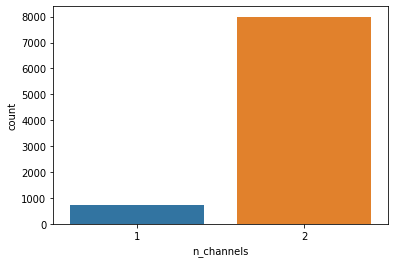

In [147]:
sns.countplot(df['n_channels'])

In [145]:
df['s_rate'].value_counts()

44100     5370
48000     2502
96000      610
24000       82
16000       45
22050       44
11025       39
192000      17
8000        12
11024        7
32000        4
Name: s_rate, dtype: int64

In [146]:
df['bit_depth'].value_counts()

16    5758
24    2753
32     169
8       43
4        9
Name: bit_depth, dtype: int64

# Sample Rate Conversion Example

In [148]:
from scipy.signal import chirp
import soundfile as sf

In [149]:
fs = 44100
T=10
t = np.linspace(0,T,T*fs,endpoint=False)                  # no. of samples generated is T*fs

In [151]:
t.shape

(441000,)

In [152]:
w = chirp(t,f0=20,f1=22050,t1=T)                           
# Returns a chirp signal that goes from frequency fmin to frequency fmax

In [154]:
w.shape

(441000,)

In [155]:
sf.write('sine_sweep_44100.wav', w, fs)           # soundfile used to read and write the files

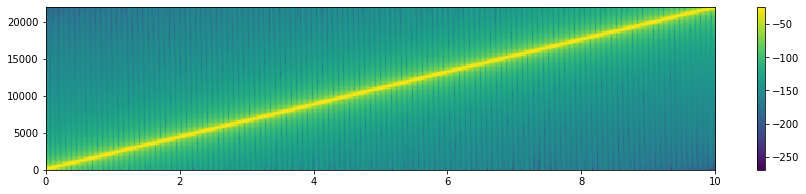

In [156]:
plt.figure(figsize=(15,3))
plt.specgram(w, Fs=44100)
plt.colorbar()
_=plt.axis((0,10,0,22050))
ipd.Audio('sine_sweep_44100.wav')

In [166]:
down_sampled = w[::2]
print(downsample.shape)                  # Downsampling from 44.1kHZ to 22.05kHZ

(220500,)


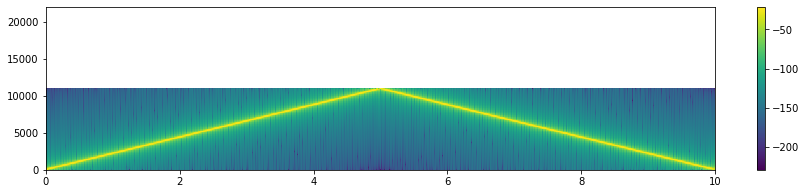

In [167]:
sf.write('sine_sweep_downsampled.wav', down_sampled, 22050)      # Create the downsample file.

plt.figure(figsize=(15,3))
plt.specgram(down_sampled, Fs=22050)                      # Fs:- sampling frequency
plt.colorbar()
_=plt.axis((0,10,0,22050))
ipd.Audio('sine_sweep_downsampled.wav')

In [171]:
full_path,_ = path('100263-2-0-117.wav')
librosa_load, librosa_sampling_rate = lb.load(full_path)
scipy_sampling_rate , scipy_load = wavfile.read(full_path)

print('Original sampling rate:  ',scipy_sampling_rate)
print('Converted Sampling rate:  ', librosa_sampling_rate)

print('original wavefile min-max range:  ',np.min(scipy_load),'-',np.max(scipy_load))
print('Converted wavefile min-max range:  ',np.min(librosa_load),'-',np.max(librosa_load))

Original sampling rate:   44100
Converted Sampling rate:   22050
original wavefile min-max range:   -1214 - 1335
Converted wavefile min-max range:   -0.02575624 - 0.027130451


In [173]:
ipd.Audio(filename=full_path)

In [184]:
sf.write('librosa_file.wav',librosa_load_change,samplerate=22050)

In [185]:
ipd.Audio(filename='librosa_file.wav')

In [177]:
librosa_load_change = np.copy(librosa_load)

In [183]:
librosa_load_change[2500:] = 1335